<a href="https://colab.research.google.com/github/araldi/FS22---Big-Data-Analysis-in-Biomedical-Research-376-1723-00L/blob/main/Week10/Survival_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install lifelines

     |████████████████████████████████| 348 kB 20.5 MB/s 
     |████████████████████████████████| 55 kB 2.8 MB/s 
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-py3-none-any.whl size=4049 sha256=37898a5d87505214229c97c8e3af4f7f0f4f60728aa039041e7df24c6e52a66b
  Stored in directory: /root/.cache/pip/wheels/9f/01/ee/1331593abb5725ff7d8c1333aee93a50a1c29d6ddda9665c9f
Successfully built autograd-gamma


In [ ]:
from lifelines.datasets import load_waltons
df = load_waltons()


In [ ]:
df['group'].value_counts()

control    129
miR-137     34
Name: group, dtype: int64

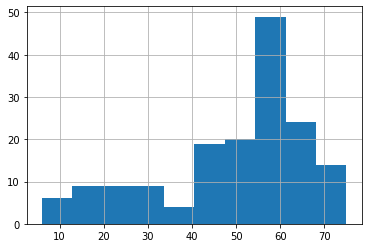

In [ ]:
df['T'].hist()

In [ ]:
df['E'].value_counts()

1    156
0      7
Name: E, dtype: int64

In [ ]:
df

,T,E,group
0,6.0,1,miR-137
1,13.0,1,miR-137
2,13.0,1,miR-137
3,13.0,1,miR-137
4,19.0,1,miR-137
...,...,...,...
158,60.0,1,control
159,60.0,1,control
160,60.0,1,control
161,60.0,1,control


# Kaplan-Meier curve and estimate

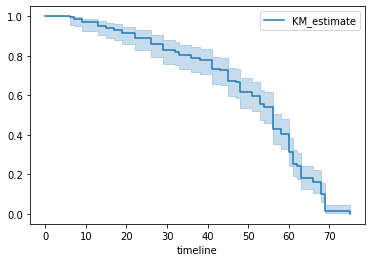

In [ ]:
# Survival plot for the whole dataset

from lifelines import KaplanMeierFitter

kmf = KaplanMeierFitter()

kmf.fit(df['T'], event_observed=df['E'])
kmf.plot_survival_function()


Text(0, 0.5, 'Survival probability')

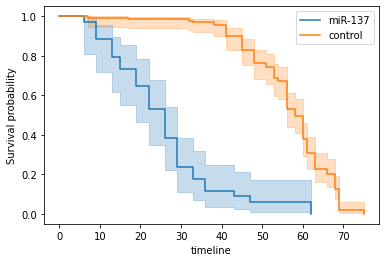

In [ ]:
# survival plot for each group

from lifelines import KaplanMeierFitter
kmf = {}
for i in df['group'].unique():
  kmf[i] = KaplanMeierFitter()
  df1 = df[df['group'] == i]
  kmf[i].fit(df1['T'], event_observed=df1['E'])
  kmf[i].plot_survival_function(label = i)

import matplotlib.pyplot as plt

plt.ylabel('Survival probability')

# Cox proportional hazard model

In [ ]:
from lifelines.datasets import load_rossi
rossi_dataset = load_rossi()

In [ ]:
rossi_dataset

,week,arrest,fin,age,race,wexp,mar,paro,prio
0,20,1,0,27,1,0,0,1,3
1,17,1,0,18,1,0,0,1,8
2,25,1,0,19,0,1,0,1,13
3,52,0,1,23,1,1,1,1,1
4,52,0,0,19,0,1,0,1,3
...,...,...,...,...,...,...,...,...,...
427,52,0,1,31,0,1,0,1,3
428,52,0,0,20,1,0,0,1,1
429,52,0,1,20,1,1,1,1,1
430,52,0,0,29,1,1,0,1,3


In [ ]:
from lifelines import CoxPHFitter

cph = CoxPHFitter()
cph.fit(rossi_dataset, duration_col='week', event_col='arrest')
cph.print_summary()  


<lifelines.CoxPHFitter: fitted with 432 total observations, 318 right-censored observations>
             duration col = 'week'
                event col = 'arrest'
      baseline estimation = breslow
   number of observations = 432
number of events observed = 114
   partial log-likelihood = -658.75
         time fit was run = 2021-12-01 16:32:22 UTC

---
            coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                         
fin        -0.38       0.68       0.19            -0.75            -0.00                 0.47                 1.00
age        -0.06       0.94       0.02            -0.10            -0.01                 0.90                 0.99
race        0.31       1.37       0.31            -0.29             0.92                 0.75                 2.50
wexp       -0.15       0.86       0.21            -0.57             0.27                 0.57                 1.30
mar        -0.43       0.65       0.38            -1.18             0.31                 0.31                 1.37
paro       -0.08       0.92       0.20            -0.47             0.30                 0.63                 1.35
prio        0.09       1.10       0.03             0.04             0.15                 1.04                 1.16

              z      p   -log2(p)
covariate                        
fin       -1.98   0.05       4.40
age       -2.61   0.01       6.79
race       1.02   0.31       1.70
wexp      -0.71   0.48       1.06
mar       -1.14   0.26       1.97
paro      -0.43   0.66       0.59
prio       3.19 <0.005       9.48
---
Concordance = 0.64
Partial AIC = 1331.50
log-likelihood ratio test = 33.27 on 7 df
-log2(p) of ll-ratio test = 15.37

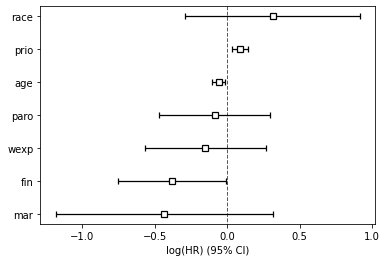

In [ ]:
cph.plot()

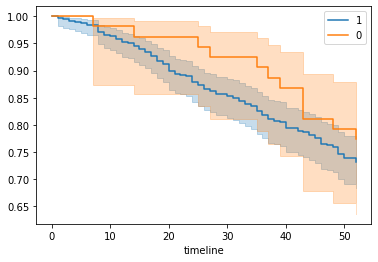

In [ ]:
from lifelines import KaplanMeierFitter
kmf = {}
for i in rossi_dataset['race'].unique():
  kmf[i] = KaplanMeierFitter()
  df1 = rossi_dataset[rossi_dataset['race'] == i]
  kmf[i].fit(df1['week'], event_observed=df1['arrest'])
  kmf[i].plot_survival_function(label = i)

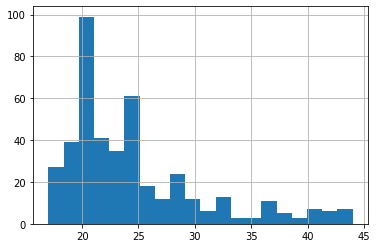

In [ ]:
rossi_dataset['age'].hist(bins = 20)

Text(0, 0.5, 'Survival from arrest')

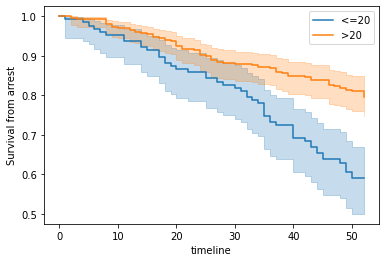

In [ ]:
import matplotlib.pyplot as plt


kmf = {}
age = 20
age_label = '<=20'
kmf[age_label] = KaplanMeierFitter()
df1 = rossi_dataset[rossi_dataset['age'] <= age]
kmf[age_label].fit(df1['week'], event_observed=df1['arrest'])
kmf[age_label].plot_survival_function(label = age_label)


age_label = '>20'
kmf[age_label] = KaplanMeierFitter()
df1 = rossi_dataset[rossi_dataset['age'] > age]
kmf[age_label].fit(df1['week'], event_observed=df1['arrest'])
kmf[age_label].plot_survival_function(label = age_label)

plt.ylabel('Survival from arrest')

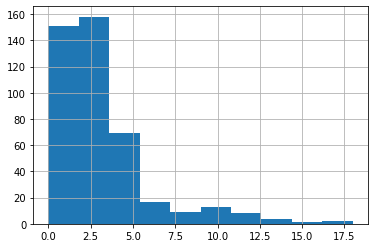

In [ ]:
rossi_dataset['prio'].hist()

In [ ]:
rossi_dataset['prio'].describe()

count    432.000000
mean       2.983796
std        2.896068
min        0.000000
25%        1.000000
50%        2.000000
75%        4.000000
max       18.000000
Name: prio, dtype: float64

Text(0, 0.5, 'Survival from arrest')

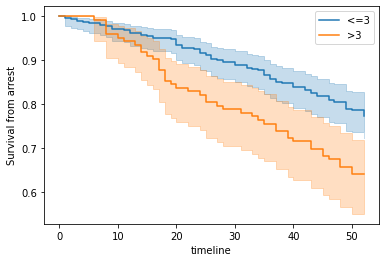

In [ ]:

kmf = {}
prio = 3
prio_label = '<=3'
kmf[prio_label] = KaplanMeierFitter()
df1 = rossi_dataset[rossi_dataset['prio'] <= prio]
kmf[prio_label].fit(df1['week'], event_observed=df1['arrest'])
kmf[prio_label].plot_survival_function(label = prio_label)


prio_label = '>3'
kmf[prio_label] = KaplanMeierFitter()
df1 = rossi_dataset[rossi_dataset['prio'] > prio]
kmf[prio_label].fit(df1['week'], event_observed=df1['arrest'])
kmf[prio_label].plot_survival_function(label = prio_label)

plt.ylabel('Survival from arrest')